In [1]:
from xgboost import DMatrix, XGBClassifier, XGBRFClassifier, XGBRegressor , XGBRFRegressor

import xgboost as xgb

from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, mean_squared_log_error as MSLE, r2_score


import numpy as np

In [2]:
boston = load_boston()
boston1 = load_boston

In [3]:
boston1

<function sklearn.datasets._base.load_boston(return_X_y=False)>

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
print(boston.keys)
print("*"*100)
print(boston.keys())

<built-in method keys of Bunch object at 0x7f22c58b2770>
****************************************************************************************************
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston.data.shape)
print("*"*100)
print(boston.feature_names)
print("*"*100)
print(boston.data)

(506, 13)
****************************************************************************************************
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
****************************************************************************************************
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df =  pd.DataFrame(boston.data)
df.columns = boston.feature_names
df["target"] = boston.target


X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

input_feature_name = df.iloc[:,:-1].columns.values
output_feature_name = "target"


In [9]:
print(df.columns)
print(input_feature_name)
print(output_feature_name)

df.info()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
target
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


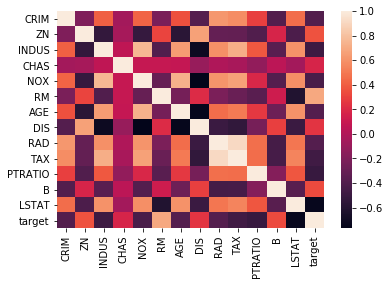

In [11]:
sb.heatmap(df.corr())

In [12]:
print(df.columns)
# sb.scatterplot(X = "CRIM", Y = "target", data=df)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


In [13]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and 
# gives it acclaimed performance and efficiency gains.

data_dmatrix = DMatrix(data = X, label = Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)


In [14]:
print(X_train.info())
print("*"*90)
print(X_test.info())
print("*"*90)
print(y_train)
print("*"*90)
print(y_test)
print("*"*90)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 203 to 365
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB
None
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 410 to 467
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0

# XGBoost's hyperparameters
##plethora of tuning parameters for tree-based learners in XGBoost 

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, 

reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and 
reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [15]:
xgboost_model = XGBRegressor(
    objective = "reg:linear",
    colsample_bytree = 0.3,
    learning_rate=0.0001,
    max_depth=5,
    alpha = 10,
    n_estimators=10
    
)


xgboost_rf_model = XGBRFRegressor(
    objective = "reg:linear",
    colsample_bytree = 0.3,
    learning_rate=0.0001,
    max_depth=5,
    alpha = 10,
    n_estimators=10
    
)

In [16]:
xgboost_model.fit(X_train, y_train)

predict_x = xgboost_model.predict(X_test)



xgboost_rf_model.fit(X_train, y_train)

predict__rf_x = xgboost_rf_model.predict(X_test)

# print(predict_x)

[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [17]:

mae = MAE(y_test, predict_x)
print("MAE : ",mae)

msle = MSLE(y_test, predict_x)
print("Mean sequare log Error : ",msle)

mse = MSE(y_test, predict_x)
print("MSE : ",mse)

r2_score_accuracy = r2_score(y_test, predict_x)
print("R2_score : ",r2_score_accuracy)


print("*"*100)

print("XGB RF Boost")

rf_mae = MAE(y_test, predict__rf_x)
print("rf MAE : ",rf_mae)

rf_msle = MSLE(y_test, predict__rf_x)
print("Mean sequare log Error rf : ",rf_msle)

rf_mse = MSE(y_test, predict__rf_x)
print("MSE rf : ",rf_mse)

rf_r2_score_accuracy = r2_score(y_test, predict__rf_x)
print("R2_score : ",rf_r2_score_accuracy)


MAE :  22.637123861850483
Mean sequare log Error :  7.411510584653634
MSE :  595.0950545080723
R2_score :  -6.192719170390003
****************************************************************************************************
XGB RF Boost
rf MAE :  22.65665515333999
Mean sequare log Error rf :  7.4833815524732765
MSE rf :  596.0529507935966
R2_score :  -6.204296949307745


In [18]:
rmse = np.sqrt(mse)
print("RMSE : ",rmse)
print("RMSE: %f" % (rmse))

print("*"*100)


rf_rmse = np.sqrt(rf_mse)
print("RMSE rf : ",rf_rmse)


RMSE :  24.39457018494223
RMSE: 24.394570
****************************************************************************************************
RMSE rf :  24.414195681889595


# k-fold Cross Validation using XGBoost

build more robust models, k-fold cross validation 

num_boost_round: denotes the number of trees you build (analogous to n_estimators)

metrics: tells the evaluation metrics to be watched during CV

as_pandas: to return the results in a pandas DataFrame.

early_stopping_rounds: finishes training of the model early if the hold-out metric
("rmse" in our case) does not improve for a given number of rounds.
seed: for reproducibility of results.


In [19]:
params = {
    "objective" : "reg:linear",
    "colsample_bytree" : 0.3,
    "linear_rate" : 0.1,
    "max_depth" : 10,
    "alpha" : 10
    
}

cv_result = xgb.cv(
    dtrain=data_dmatrix,
    params=params, nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123
)

[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.352567,0.012048,17.354313,0.001677
1,12.998922,0.056980,12.994745,0.107389
2,9.971335,0.219584,10.044722,0.323191
3,7.666661,0.047198,7.957067,0.207116
4,6.229122,0.152843,6.706748,0.349224


In [21]:
print(cv_result["test-rmse-mean"].head(2))

0    17.354313
1    12.994745
Name: test-rmse-mean, dtype: float64


# Visualize Boosting Trees and Feature Importance

In [22]:
xgb_reg_train = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb_reg_train

[21:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


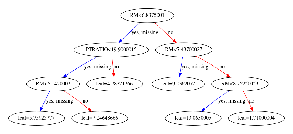

In [26]:
xgb.plot_tree(xgb_reg_train, num_trees=0)
plt.figure(figsize=(50,40)) 
#OR
# plt.rcParams["figure.figsize"] = [50,10]

plt.show()

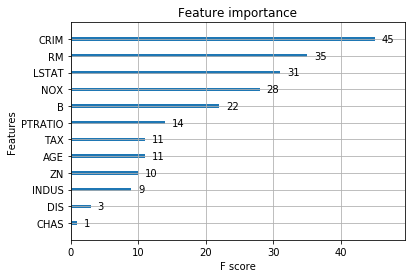

In [24]:
xgb.plot_importance(xgb_reg_train)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [105]:
single_input = X_test.iloc[0]
print(single_input)

print("*"*100)
single_input_value = X_test.iloc[0].values
print(single_input_value)

CRIM        51.1358
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           5.7570
AGE        100.0000
DIS          1.4130
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B            2.6000
LSTAT       10.1100
Name: 410, dtype: float64
****************************************************************************************************
[5.11358e+01 0.00000e+00 1.81000e+01 0.00000e+00 5.97000e-01 5.75700e+00
 1.00000e+02 1.41300e+00 2.40000e+01 6.66000e+02 2.02000e+01 2.60000e+00
 1.01100e+01]


In [106]:
# predict_x_single = xgboost_model.predict(single_input_value)

# print(predict_x_single)


print(type(X_test))
print(type(single_input))
print(type(single_input_value))
print(type(single_input_value.reshape(1,-1)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [42]:

def graphDetail(data):
    print("Prints the values to a stream, or to sys.stdout by default boxplot      :  ", data.boxplot())
    print("Prints the values to a stream, or to sys.stdout by default hist         :  ", data.hist())
    print("Prints the values to a stream, or to sys.stdout by default plot         :  ", data.plot())
    plt.show()

Prints the values to a stream, or to sys.stdout by default boxplot      :   AxesSubplot(0.125,0.125;0.775x0.755)
Prints the values to a stream, or to sys.stdout by default hist         :   [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22b8660650>
Prints the values to a stream, or to sys.stdout by default plot         :   AxesSubplot(0.125,0.125;0.775x0.755)


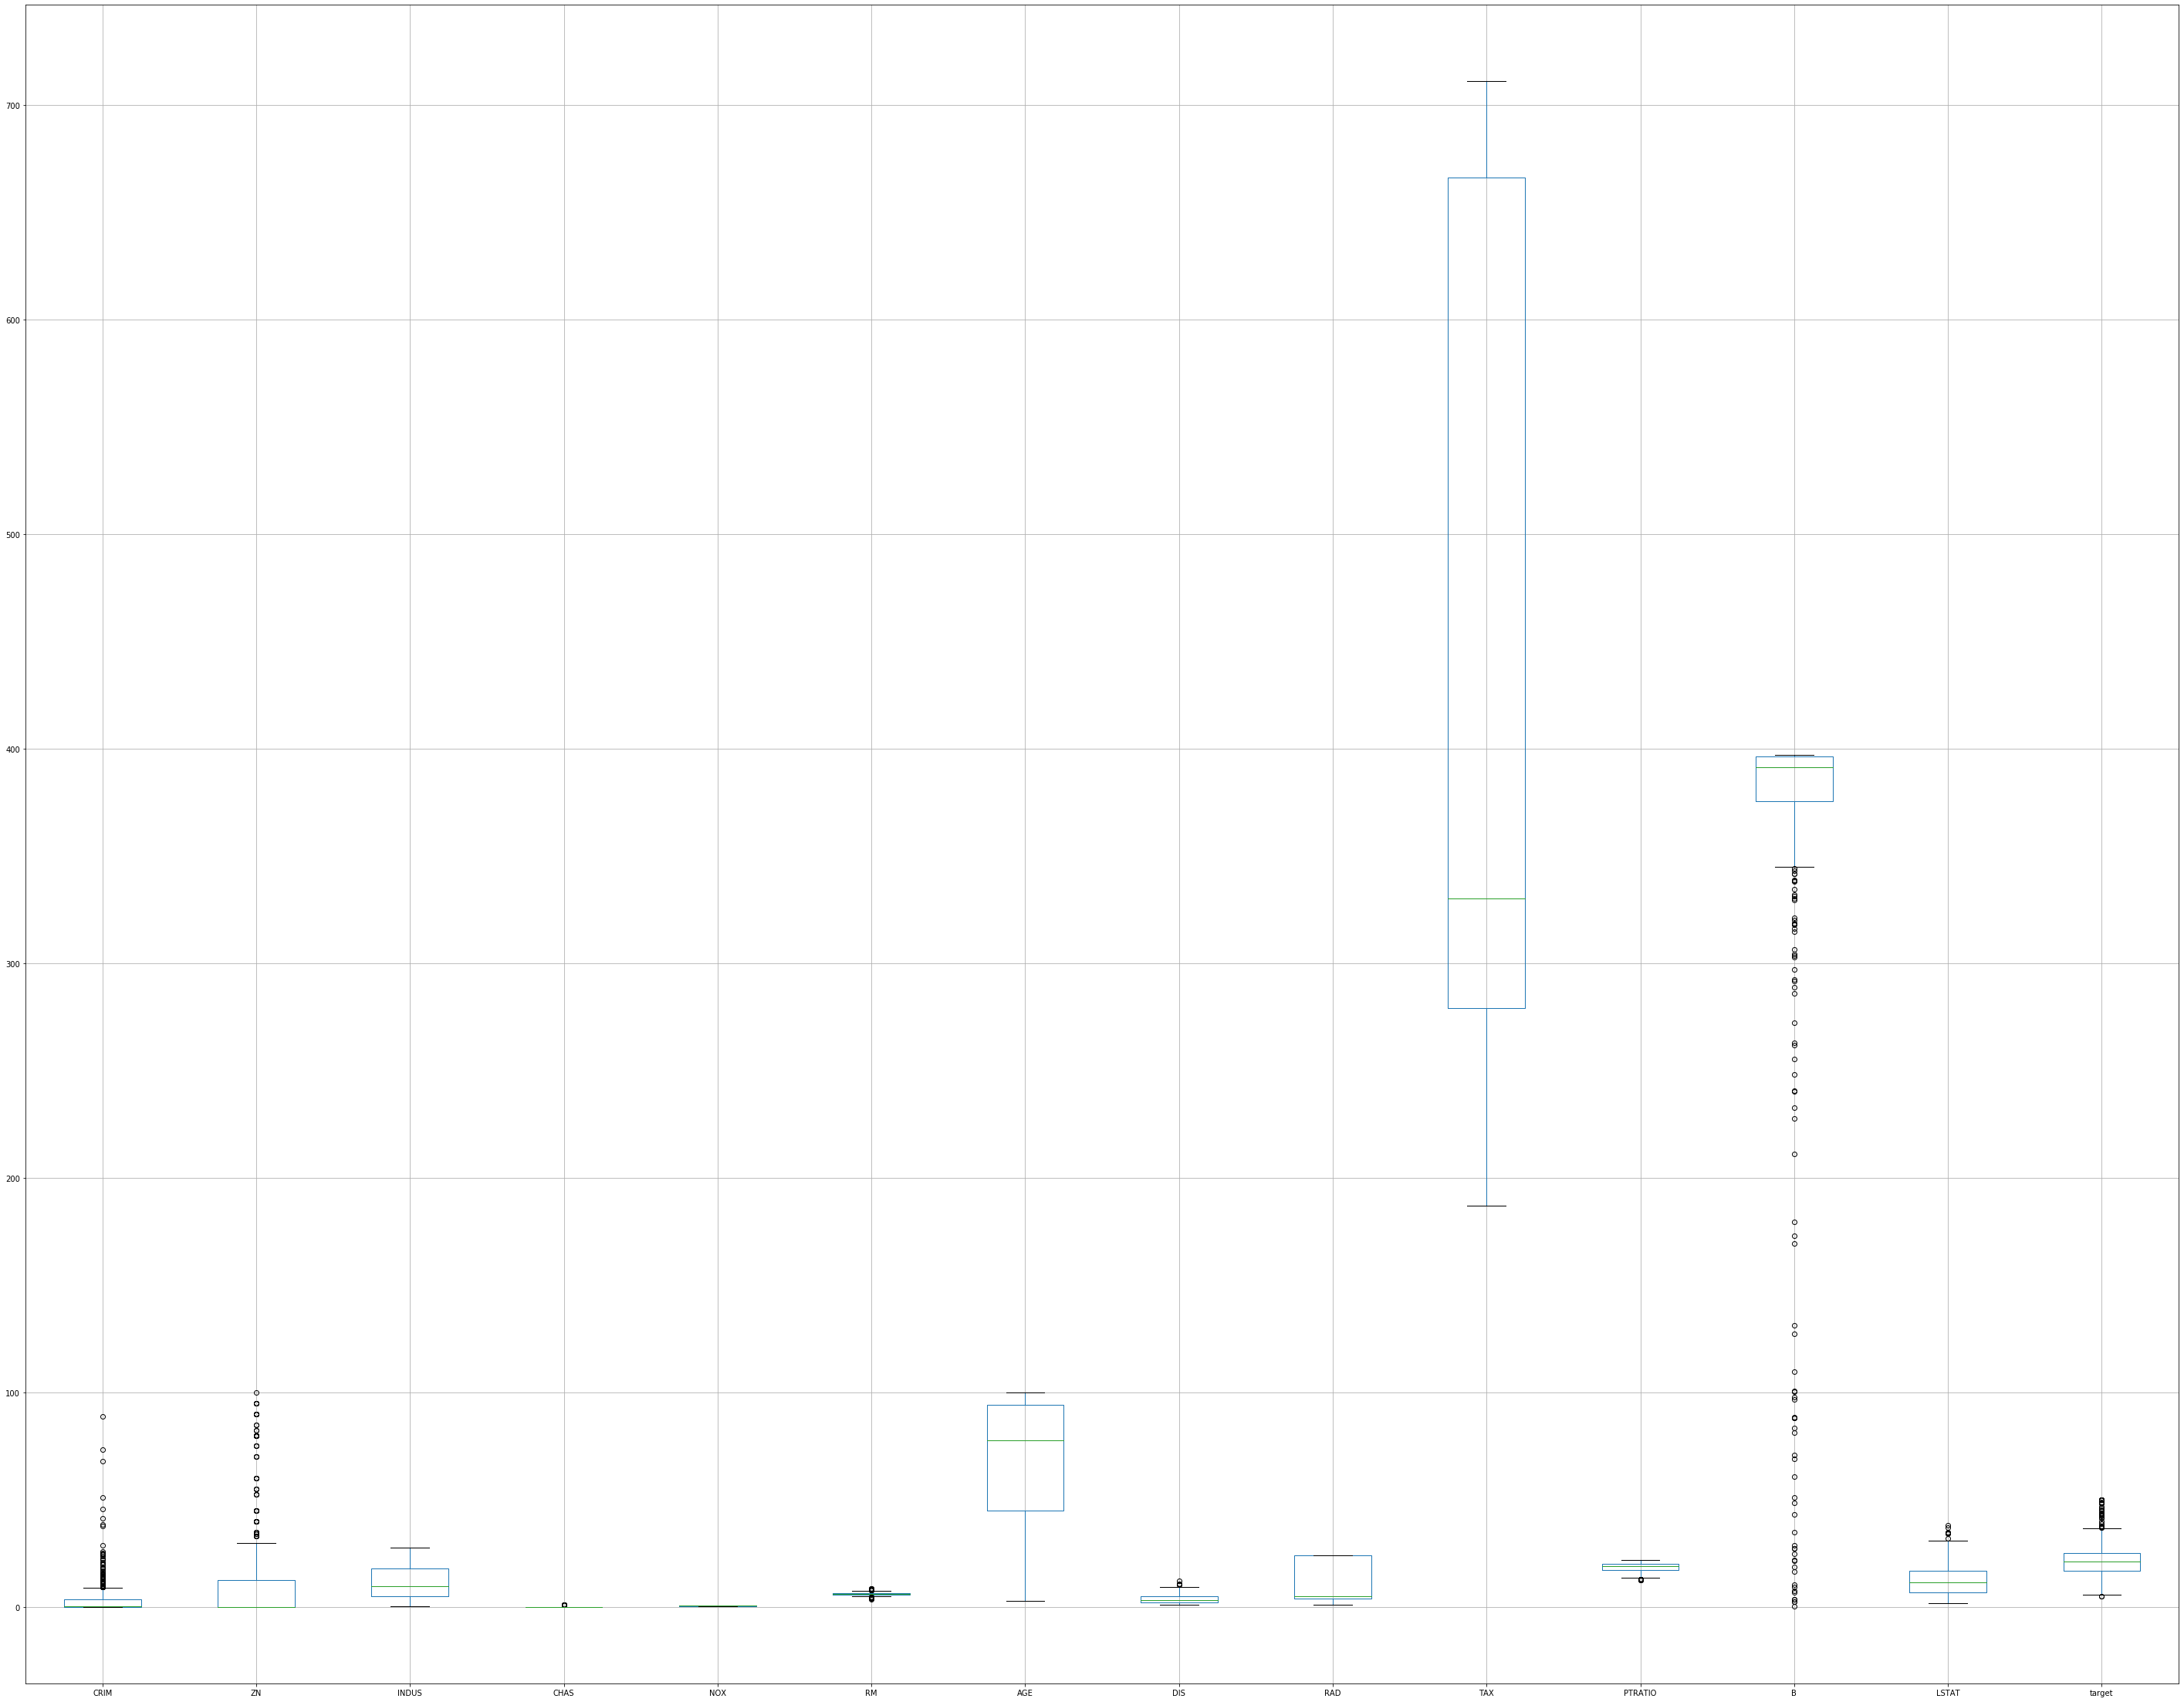

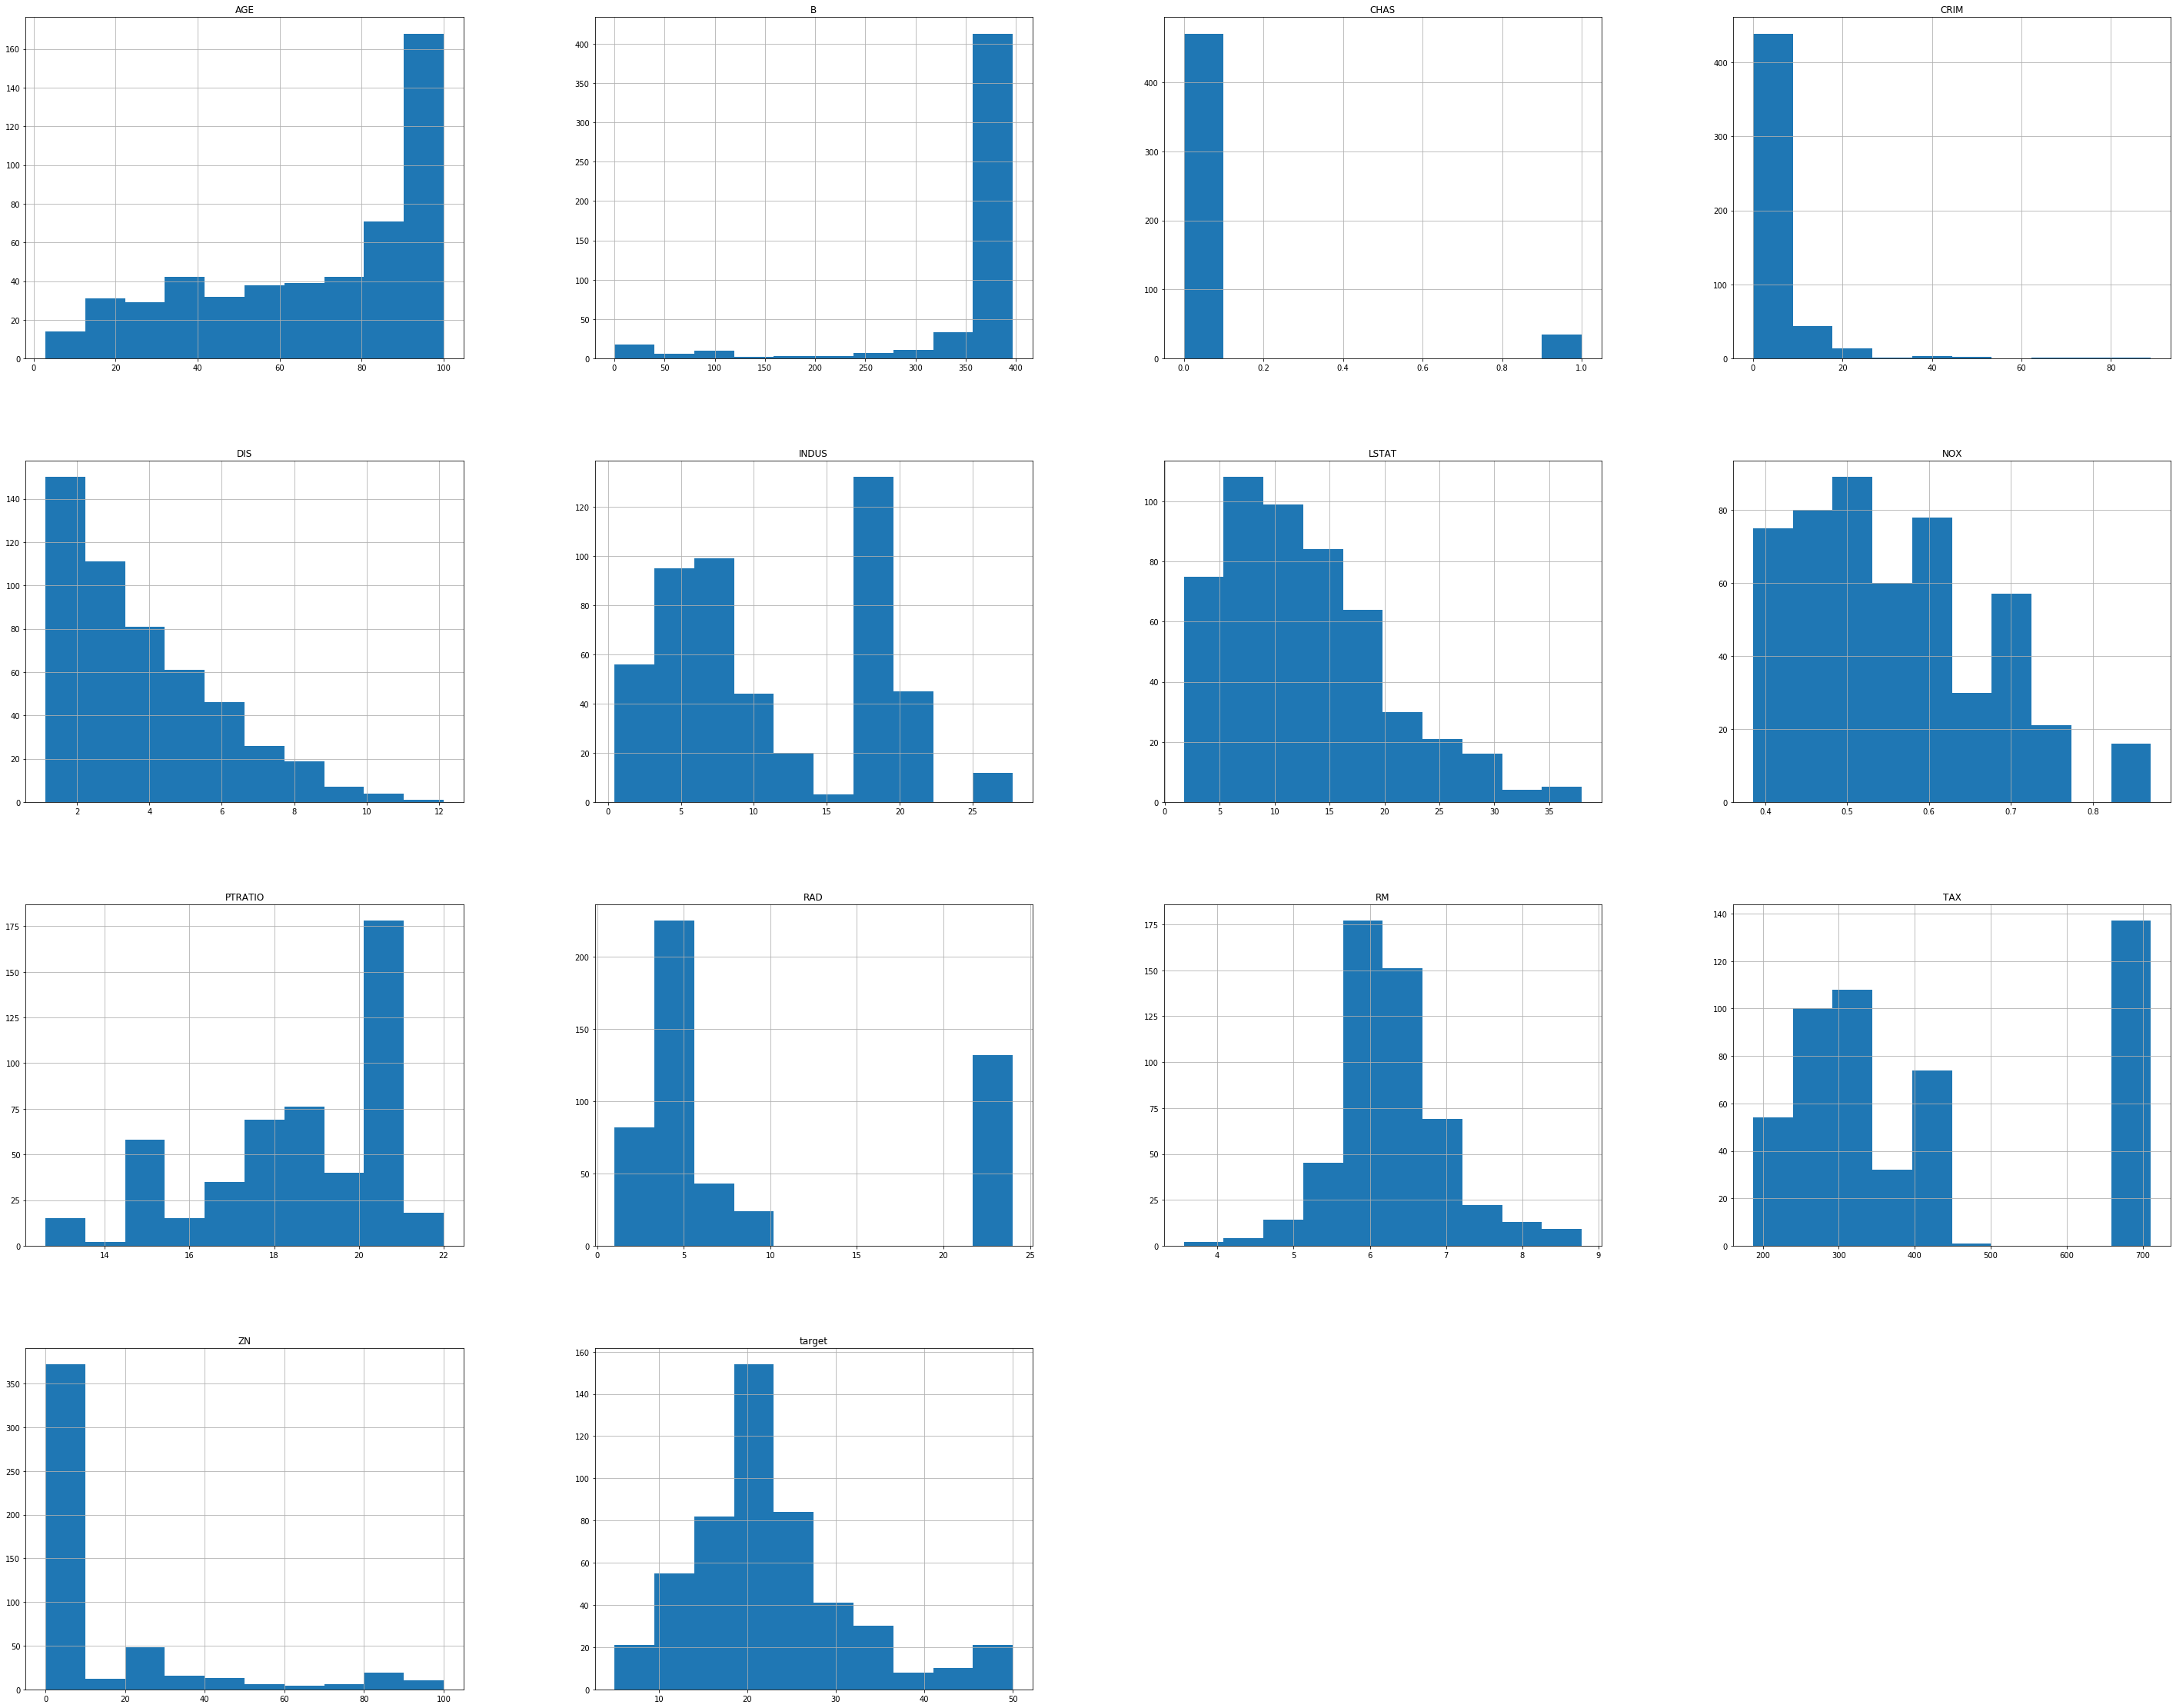

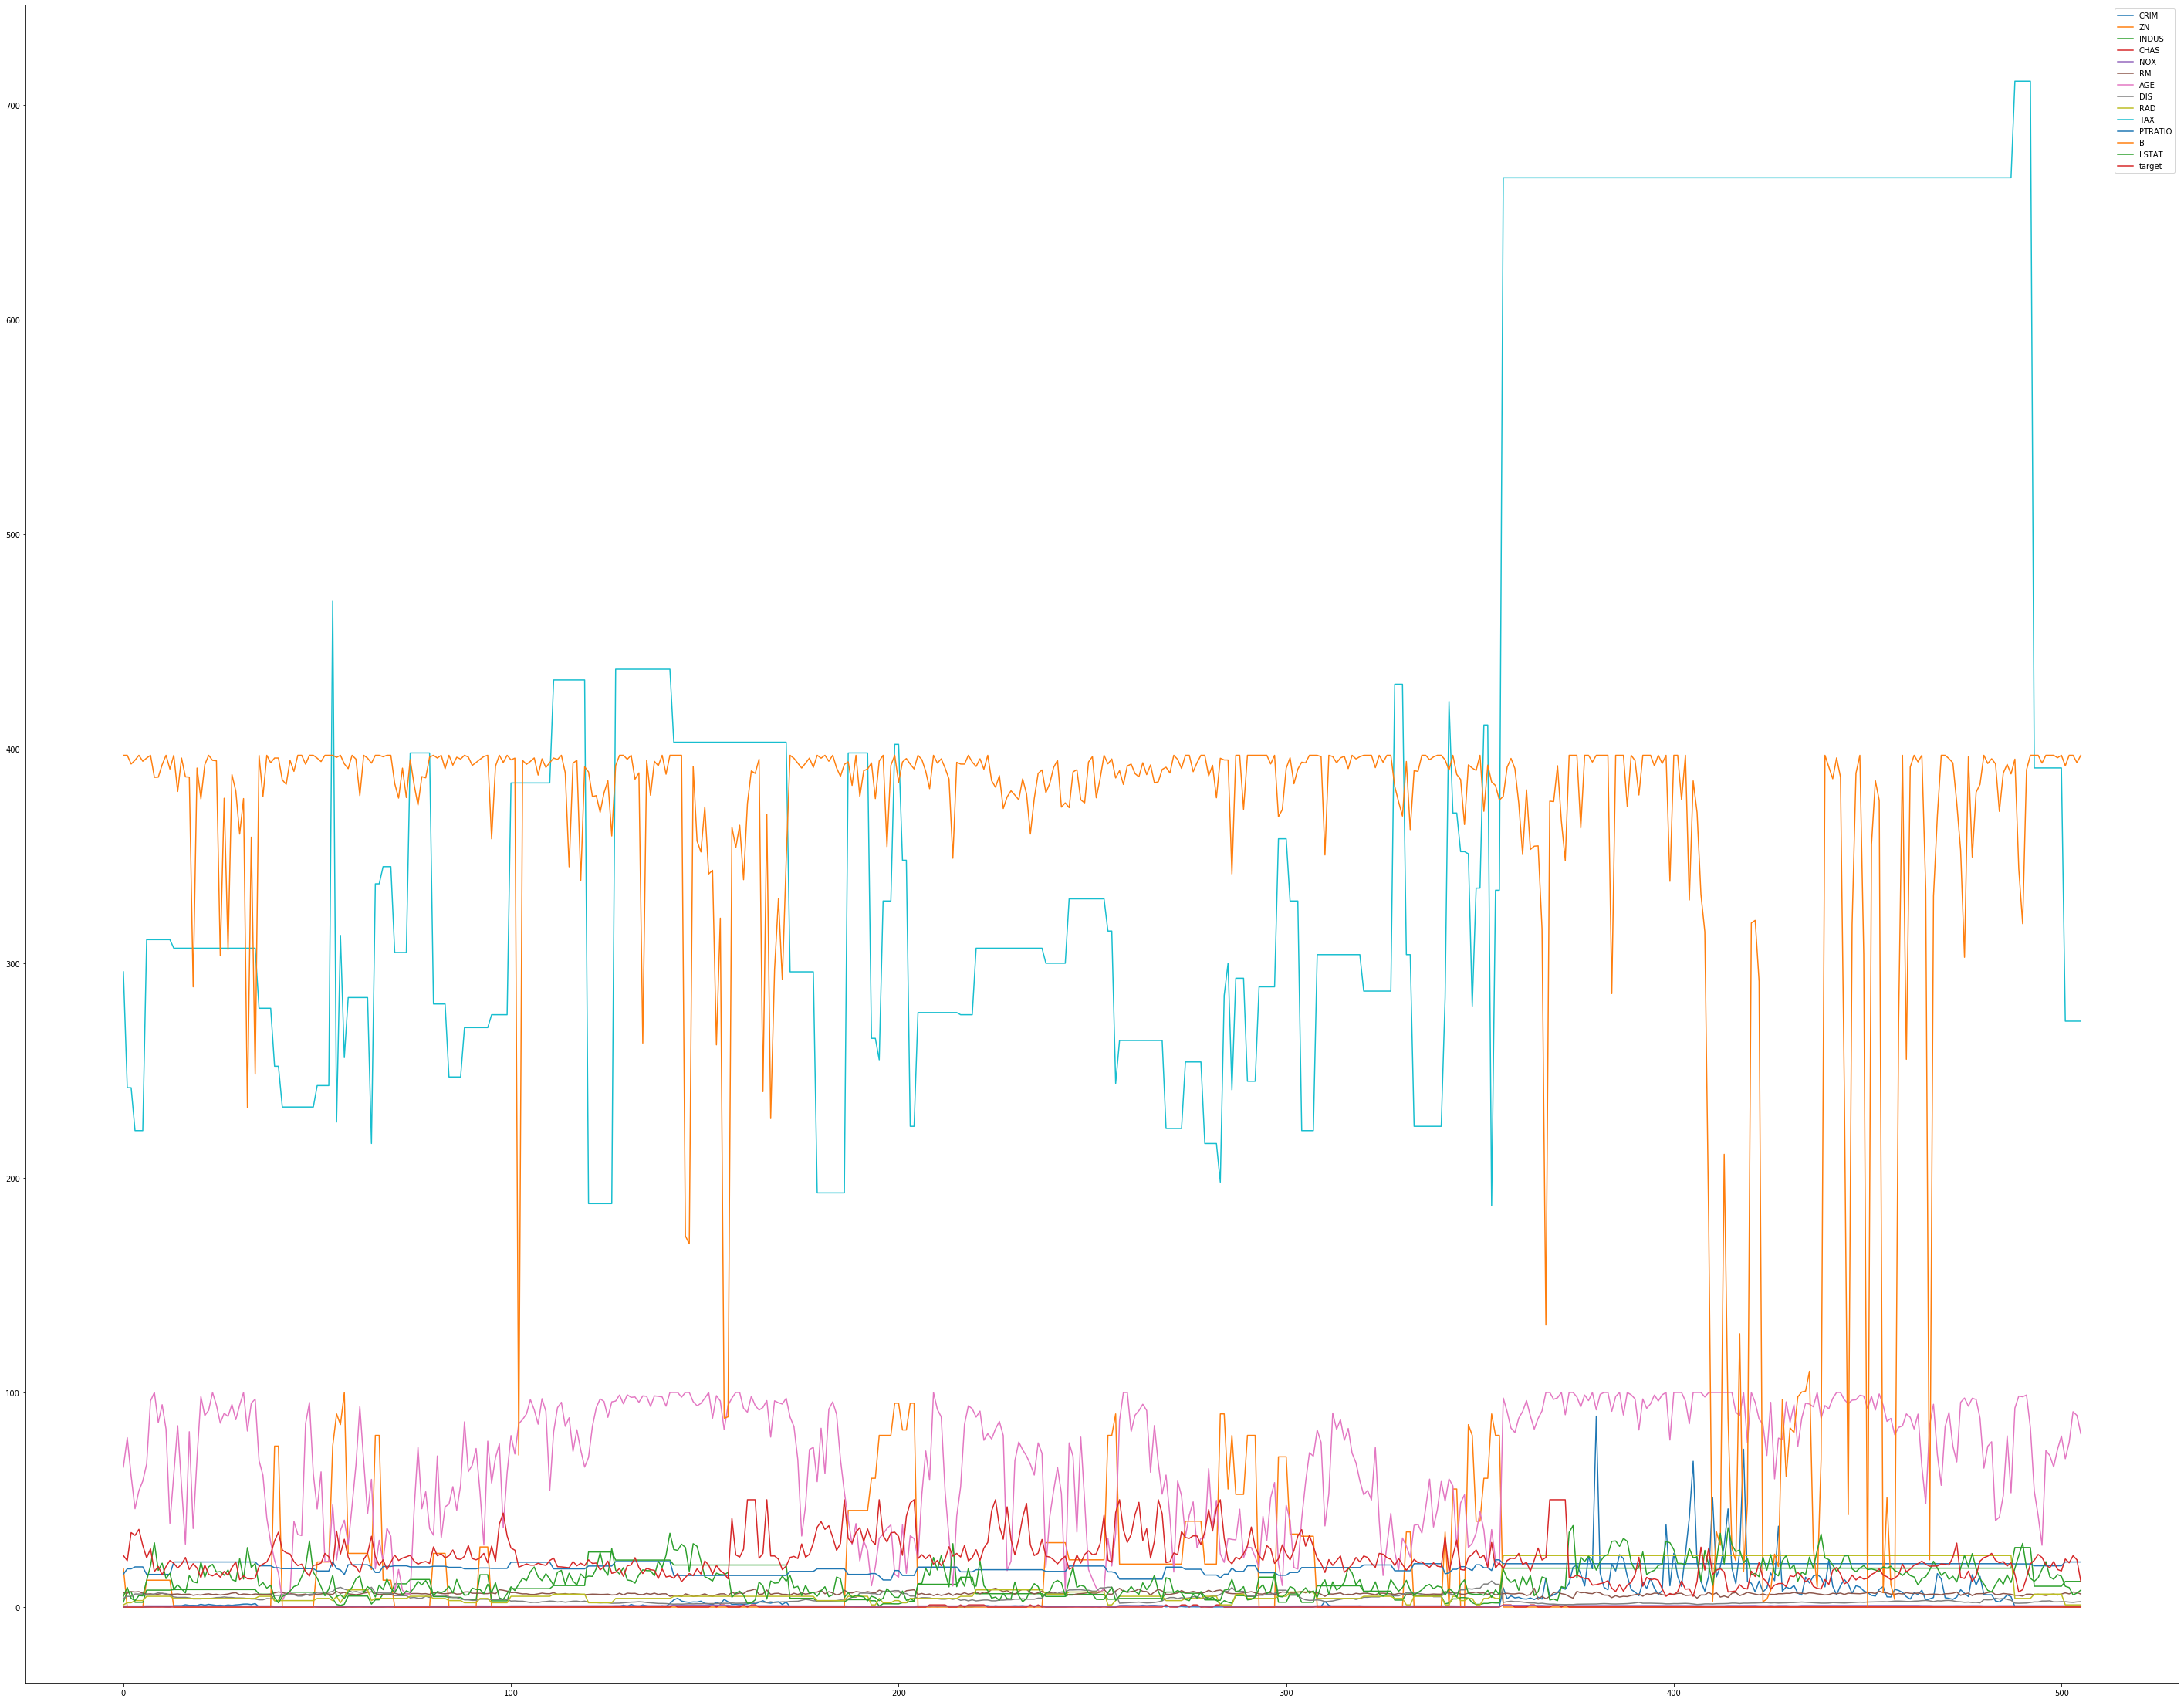

In [44]:
graphDetail(df)

In [34]:
# df.info()

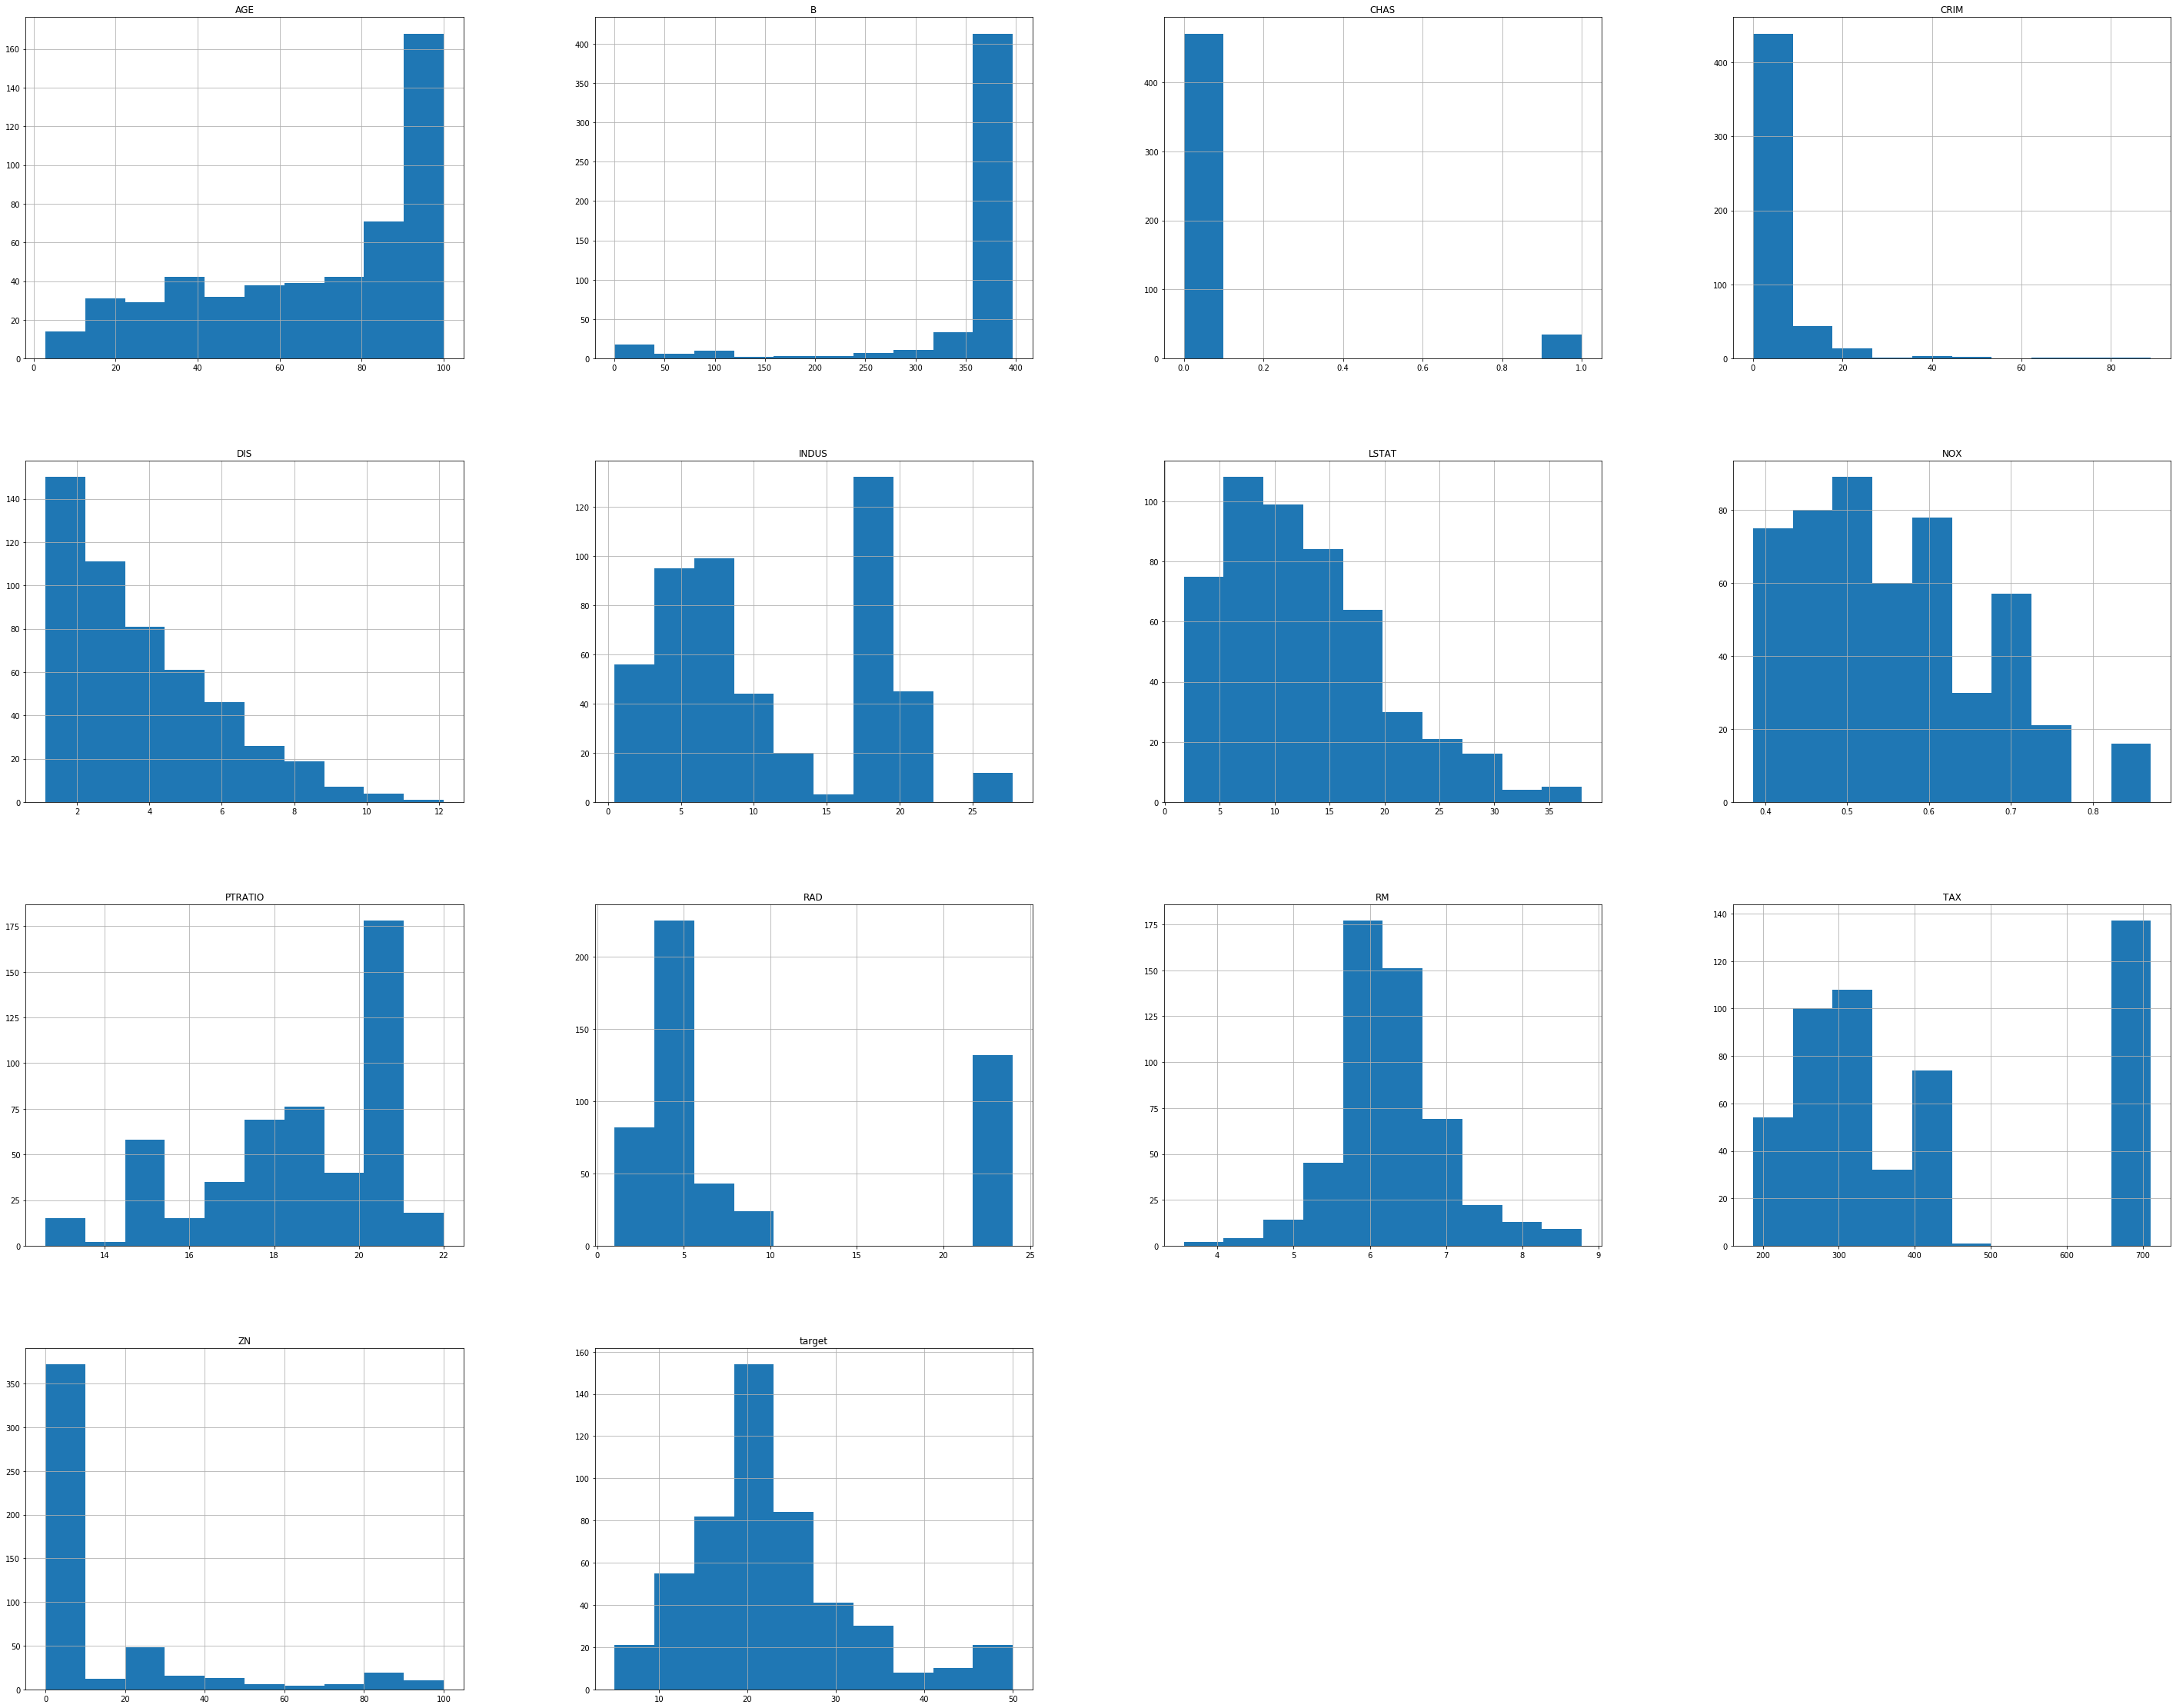

In [39]:
df.hist()
plt.show()

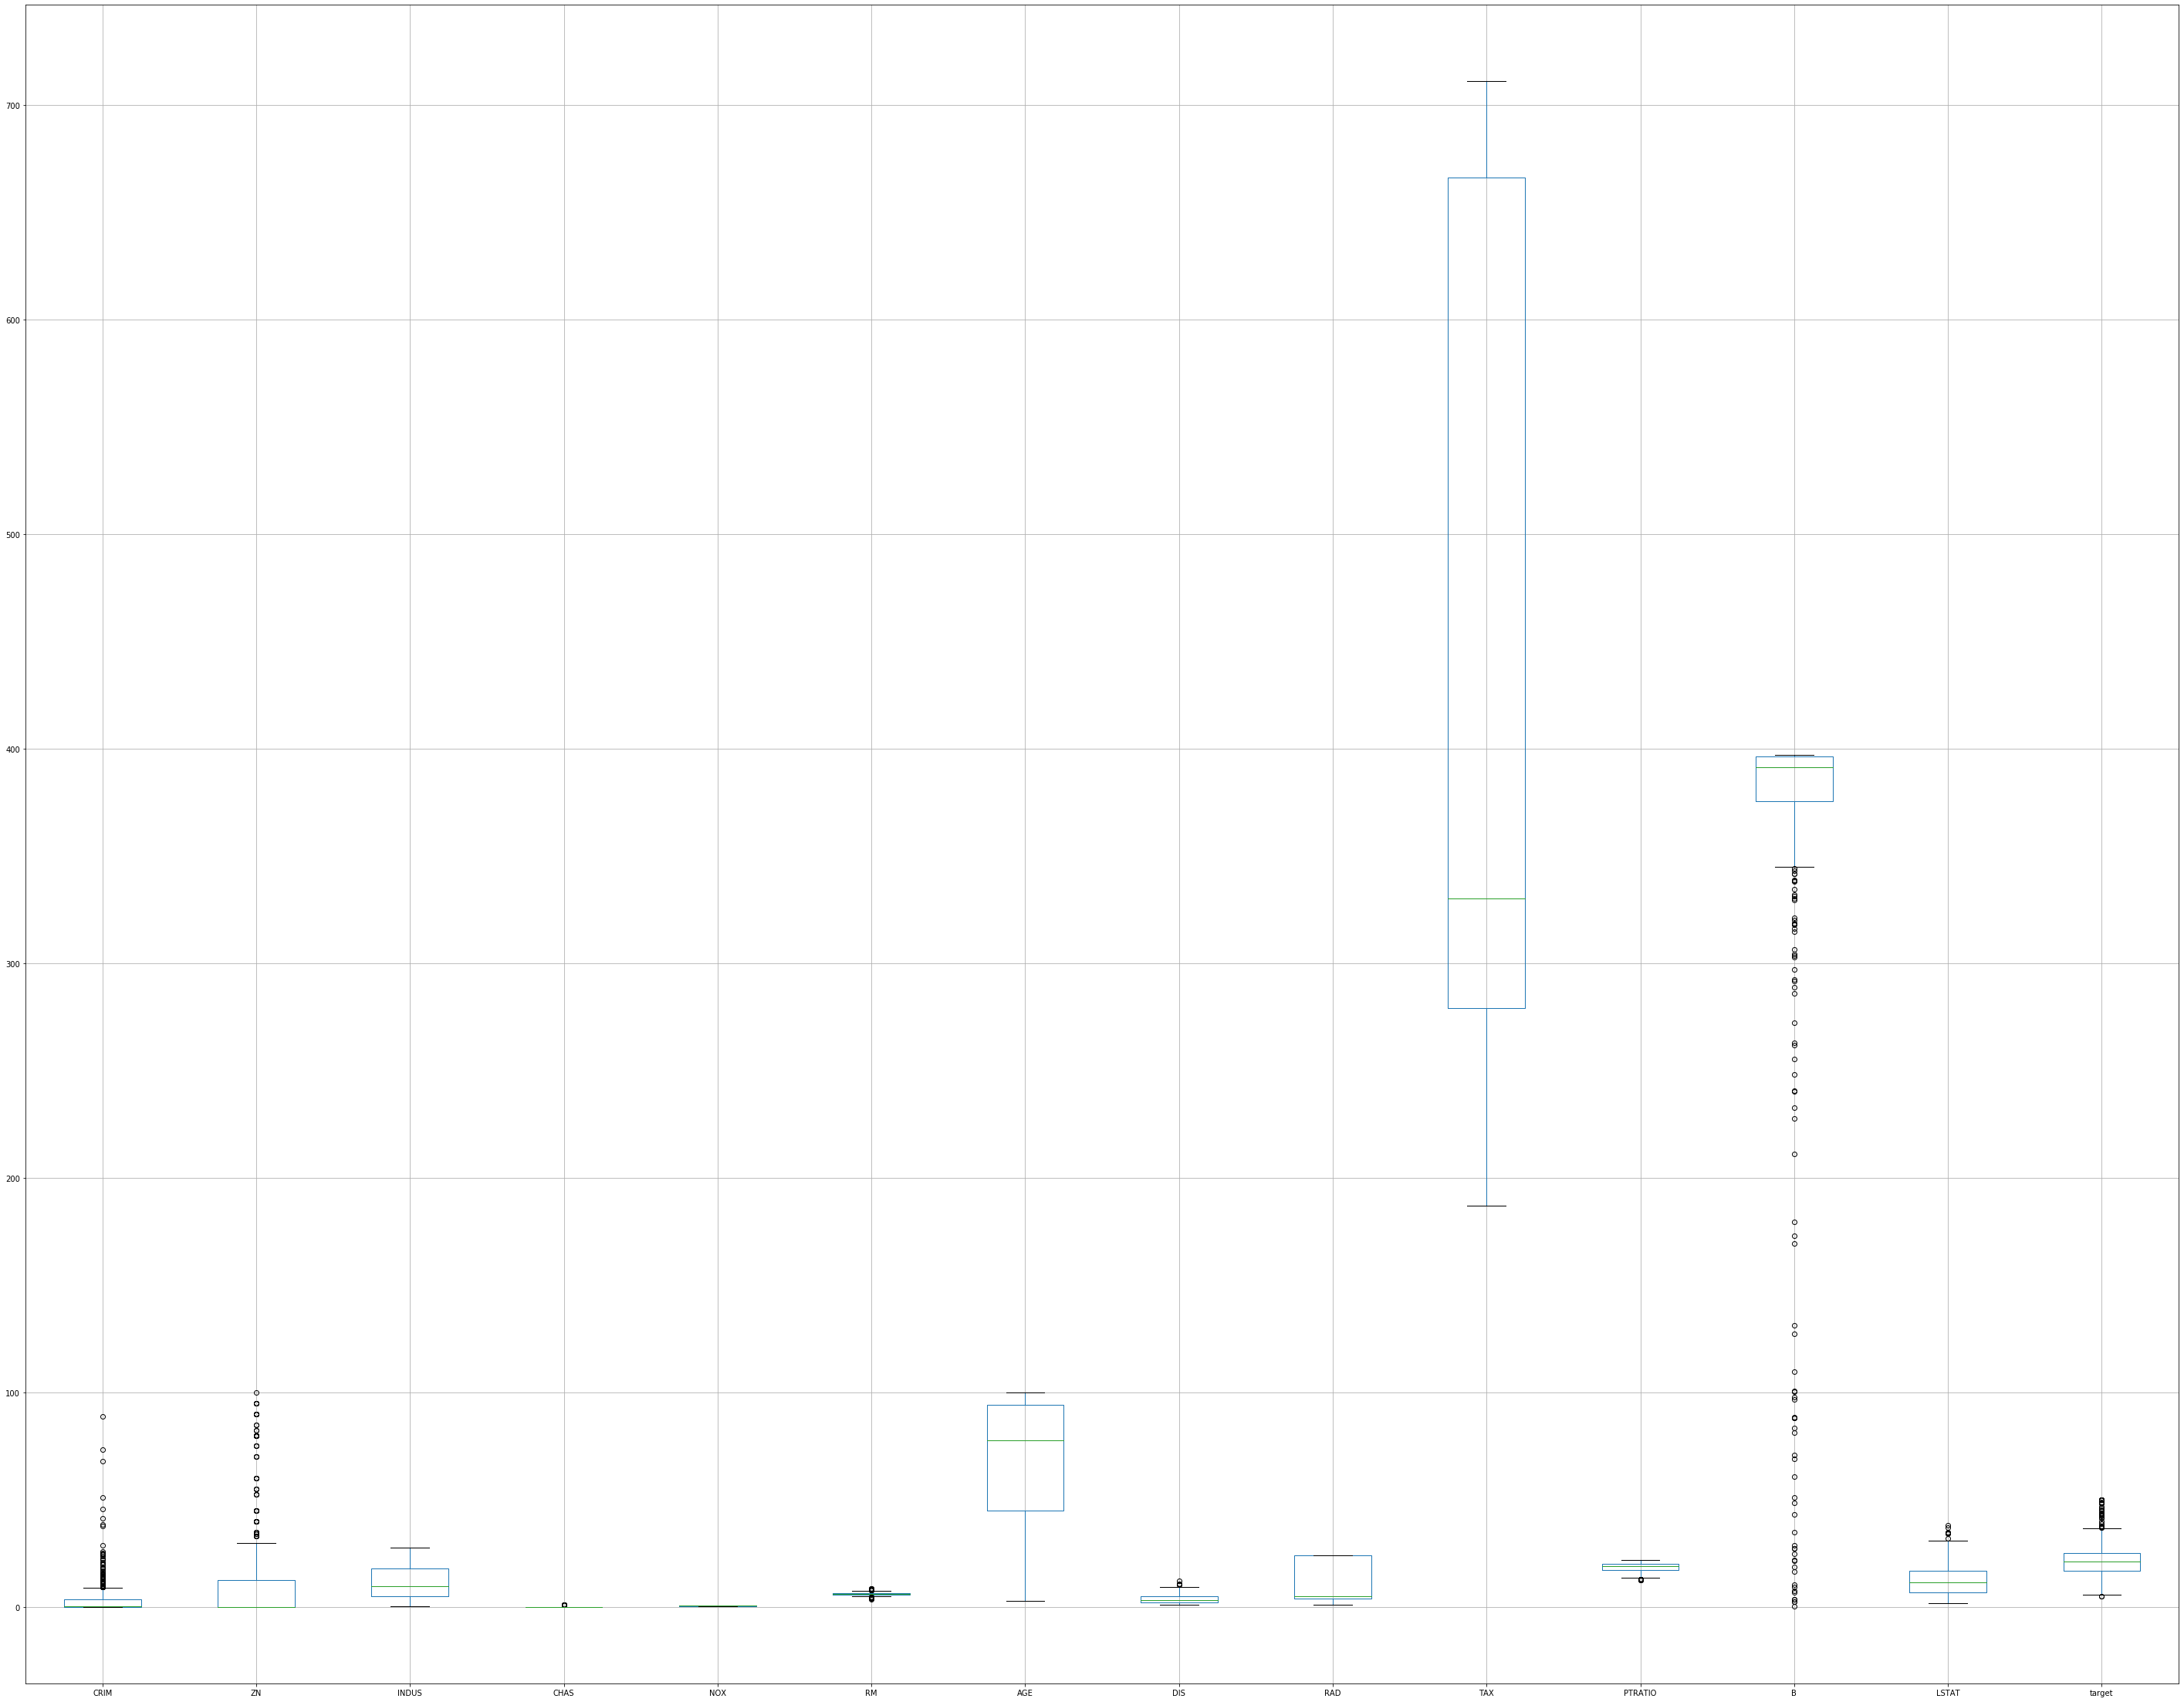

In [41]:
df.boxplot()

In [45]:
def getDataAllDetails(data):
    print("Return a tuple representing the dimensionality of the DF.  :   ", data.shape)
    print("Count of Each Data                                          :  ", data.count())
    print("Start,End,Column,Step                                       :  ", data.axes)
    print("Column                                                      :  ", data.columns)
    print("First 5 items                                               :  ", data.head(2))
    print("Missing Vlaue                                               :  ", data.isnull().sum())
    print("information                                                 :  ", data.info())
    print("Description                                                 :  ", data.describe())
    print("Size(Row*Column) represent the no of elements in this object:  ", data.size)
    print("Return unbiased skew over requested axis                    :  ", data.skew())
    print("std err of mean                                             :  ", data.sem())
    print("Return sample standard deviation over requested axis        :  ", data.std())
    print("sum of every data                                           :  ", data.sum())
    print("Copy Data to other                                          :  ", data.copy())
    print("Correlation of Data                                         :  ", data.corr())
    print("Covariance of Columns                                       :  ", data.cov())
    print("cumulative sum over data                                    :  ", data.cumsum())
    print("cumulative min or max                                       :  ", data.cummin())
    print("Remove duplicate row                                        :  ", data.drop_duplicates())
    print("Romove missing Value                                        :  ", data.dropna())
    print("Drop Specify Label                                          :  ", data.drop(labels=[2, 49, 78, 88]))
    print("Drop Specify Label(Plz check inplace true means)            :  ",
          data.drop(labels=[2, 49, 78, 88], inplace=True))
    print("Tell about Data Types                                       :  ", data.dtypes)
    print("Find the Duplicate Row                                      :  ", data.duplicated())
    print("DataFrame is Empty(True) or not(False)                      :  ", data.empty)
    print("Expanding                                                   :  ", data.expanding())
    print("Fill Na/Nan Value using Specify metho                       :  ", data.fillna)
    # print("rows/columns of DF A/c to labels in specified index   :  ",data.filter)
    # print(" check it(fill backward)          :  ",data.bfill())
    # print(" check it(fill forward)         :  ",data.ffill())
    # print("    check it ?      :  ",data.from_csv)
    # print("       check it ?   :  ",data.from_dict,data.from_items,data.from_records)
    print("Return(indication of sparse/dense and dtype) in Df          :  ", data.from_records)
    print("Tell about Data Types(check abobe ftypes)                   :  ", data.dtypes)
    print("Return counts of unique dtypes in this object               :  ", data.get_dtype_counts())
    print("Return counts of unique dtypes in this object(dense)        :  ", data.get_ftype_counts())
    print("Return ndarray after convert sparse values to dense         :  ", data.get_values())
    # print("   check it       :  ",data.groupby)
    print("RangeIndex(start=0,stop=data size, step=1)                  :  ", data.index)
    print("concise summary of DF,Dtypes,Memory,Shape,Many Info         :  ", data.info)
    # print("    check it      :  ",data.insert)
    # print("  check it        :  ",data.interpolate)
    # print("   check it       :  ",data.is_copy)
    print("Detect the Missing Value(Both Same isna & isnull )           :  ", data.isna().sum(), data.isnull().sum())
    # print("    check it      :  ",data.join)
    print("Get the 'info axis(same as columns : data.columns)           :  ", data.keys, data.columns)
    print("unbiased kurt over requested axis using Fisher's def         :  ", data.kurt, data.kurtosis)
    print("both are same data.kurt & data.kurtosis                      :  ", data.kurt, data.kurtosis)
    print("Return index for last non-NA/null value                      :  ", data.last_valid_index())
    print("mean absolute deviation value for the requested axis         :  ", data.mad())
    print("Returns the maximum of the values in the object              :  ", data.max())
    print("Returns the minimum of the values in the object              :  ", data.min())
    print("Return the mean of the values for the requested axis         :  ", data.mean())
    print("Return the median of the values for the request axis         :  ", data.median())
    # print("   check it       :  ",data.melt())
    print("Return the memory usage of each column in bytes.             :  ", data.memory_usage())
    # print("  check it        :  ",data.merge)
    # print("    check it (mod, mul,multiply)      :  ",data,mod,data.mul,data.multiply)
    print("Return an int representing the no of axes/array dims         :  ", data.ndim)
    print("row's DF sorted by the n smallest values of `columns         :  ", data.nsmallest(n=10, columns="price"))
    print("row's DF sorted by the n largest values of `columns          :  ", data.nlargest(n=10, columns="price"))
    print("Find existing(non-missing) values(Same:notna,notnull)        :  ", data.notna(), data.notnull())
    print("Series with no of distinct observations over requested axis  :  ", data.nunique(axis=0))
    # print("     check it     :  ",data.pct_change)
    # print(" check it(pivot,pivot_table)         :  ",data.pivot,data.pivot_table)
    print("Return item & drop/delete from frame.Raise Error,if not found:  ", data.pop("price"))
    # print("  check it        :  ",data.pow)
    print("product/prod same of the value for the request(default axis=0):  ", data.prod(axis=0), data.product(axis=0))
    print("values quantile over requested axis, a la numpy.percentile.   :  ", data.quantile())
    # print("    check it      :  ",data.query)
    # print("       check it   :  ",data.radd)
    print("Compute numerical data rank(1 through n)along axis.Equal values:  ", data.rank(numeric_only=True, axis=0))
    print("Conform DF to new index with optional filling logic,placing    :  ", data.reindex().sum())
    # print("check it  :  ",data.rename,data.rename_axis,data.reorder_levels,data.replace,data.resample,data.resample)
    # print("   check it :  ",data.reset_index(),data.rmod,data.rmul,data.rolling,data.rpow,data.rsub,data.rtruediv)
    print("Round a DataFrame to a variable number of decimal places.      :  ", data.round())
    print("Return a random sample of items from an axis of object.        :  ", data.sample())
    print("check it      :  ", data.select, data.set_index, data.set_value)
    print("Return unbiased standard error of the mean over requested axis.:  ", data.sem())
    print("Shift index by desired no of periods with an optional time freq:  ", data.shift(axis=0, periods=3))
    print("Equivalent to `shift` without copying data                     :  ", data.slice_shift(axis=0, periods=5))
    print("Sort object by labels (along an axis=0, default)               :  ",
          data.sort_index(axis=1, ascending=False))
    print("Sort by the values along either axis                           :  ",
          data.sort_values(by=["price", "yearsOld"], axis=0, ascending=False))
    print("Sort multilevel index by chosen axis level(sort based on words):  ",
          data.sortlevel(level=0, axis=1, ascending=True))
    # print("Check it  :  ",data.stack(),data.sub,data.subtract())
    print("Display All Items(same as head(total no of items))             :  ", data.style)
    print("Interchange axes & swap values axes(swap rows to columns)      :  ",
          data.swapaxes(axis1=0, axis2=1, copy=False))
    print("Interchange axes & swap values axes appropriately              :  ", data.swaplevel(i=0, j=0, axis=0))
    # print(" check it    :  ",data.unstack,data.update())
    print("Return unbiased variance over requested axis.                  :  ", data.var(axis=0))
    # print("   check it       :  ",data.where,data.xs())

In [46]:
getDataAllDetails(df)

Return a tuple representing the dimensionality of the DF.  :    (506, 14)
Count of Each Data                                          :   CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
target     506
dtype: int64
Start,End,Column,Step                                       :   [RangeIndex(start=0, stop=506, step=1), Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')]
Column                                                      :   Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
First 5 items                                               :         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  

Remove duplicate row                                        :           CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target

AttributeError: 'DataFrame' object has no attribute 'get_dtype_counts'